<a href="https://colab.research.google.com/github/SanskarAgrahari-07/Deep-Learning-and-Neural-Networks-Lab-Work/blob/main/nndl_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data --unzip

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 97% 413M/427M [00:02<00:00, 240MB/s]
100% 427M/427M [00:02<00:00, 215MB/s]


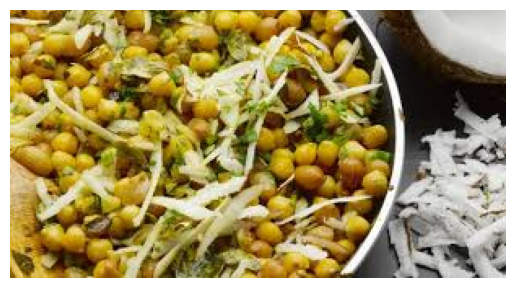

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define path to images
image_folder = "DATASET/TEST/O"  # Update based on folder structure
image_files = os.listdir(image_folder)

# Read and display the first image
img_path = os.path.join(image_folder, image_files[1])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:

train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 141s 191ms/step - accuracy: 0.7633 - loss: 0.5024 - val_accuracy: 0.8663 - val_loss: 0.3288
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 130s 185ms/step - accuracy: 0.8220 - loss: 0.4137 - val_accuracy: 0.8667 - val_loss: 0.3274
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 129s 182ms/step - accuracy: 0.8366 - loss: 0.3944 - val_accuracy: 0.8834 - val_loss: 0.2945
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 185ms/step - accuracy: 0.8489 - loss: 0.3708 - val_accuracy: 0.8671 - val_loss: 0.3336
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 130s 184ms/step - accuracy: 0.8531 - loss: 0.3615 - val_accuracy: 0.8993 - val_loss: 0.2541
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9042 - loss: 0.2363
Test Accuracy: 0.8993


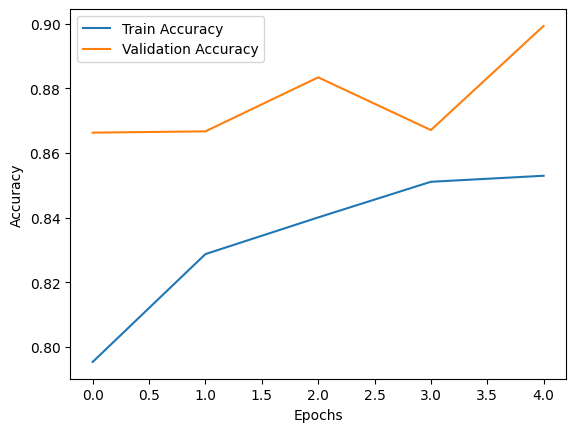

In [ ]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save("waste_classification_model.h5")

A1. Design and train a convolutional neural network (CNN). Inspect the CNN architecture. Sample
code provided for help

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.
{'O': 0, 'R': 1}


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,018 (18.43 MB)

 Trainable params: 4,829,314 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 145s 194ms/step - accuracy: 0.7519 - loss: 0.6182 - val_accuracy: 0.8110 - val_loss: 0.4175
Epoch 2/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 186ms/step - accuracy: 0.8219 - loss: 0.4099 - val_accuracy: 0.7967 - val_loss: 0.4536
Epoch 3/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 187ms/step - accuracy: 0.8346 - loss: 0.3869 - val_accuracy: 0.8341 - val_loss: 0.4508
Epoch 4/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 142s 187ms/step - accuracy: 0.8462 - loss: 0.3633 - val_accuracy: 0.8770 - val_loss: 0.3148
Epoch 5/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 188ms/step - accuracy: 0.8543 - loss: 0.3449 - val_accuracy: 0.8739 - val_loss: 0.3262
Epoch 6/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 132s 187ms/step - accuracy: 0.8581 - loss: 0.3460 - val_accuracy: 0.8444 - val_loss: 0.3993
Epoch 7/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 133s 188ms/step - accuracy: 0.8654 - loss: 0.3272 - val_accuracy: 0.8209 - val_loss: 0.4029
Epoch 8/15
706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 185ms/step - accuracy: 0.8649 -

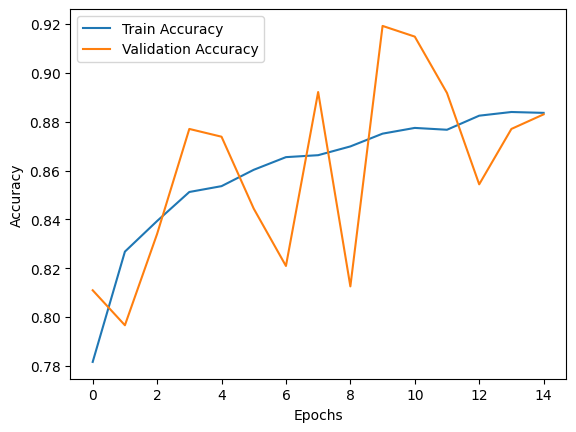

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Input
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import os


# Image parameters
img_size = (150, 150)  # Resize images
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Check class indices
print(train_generator.class_indices)

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer: Adjust units to number of classes (e.g., 6 for 6 waste categories)
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the Model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Model Summary
model.summary()

# Train the Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the Model
model.save("waste_classification_model.h5")


A2. Train the model with the training data. Plot the training and validation losses for the training
session. Observe the graphs and interpret.

In [1]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

A3.Evaluate the model accuracy with below code

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

# Print the accuracy
print(f"Test Accuracy: {test_acc:.4f}")
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')


A4. Inspect the filters (at least a few of them) for the first convolution layer.

In [ ]:
# Get the weights of the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for better visualization
filters_min, filters_max = filters.min(), filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot the first 5 filters
plt.figure(figsize=(10, 5))
for i in range(5):  # Adjust number if needed
    plt.subplot(1, 5, i + 1)
    plt.imshow(filters[:, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f"Filter {i+1}")

plt.show()


A5. Inspect the impact a filter creates on an input image with 2D convolution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Select an image from the training dataset
sample_image, _ = train_generator.next()  # Get a batch of images
sample_image = sample_image[0]  # Take the first image
sample_image_gray = np.mean(sample_image, axis=-1)  # Convert to grayscale if needed

# Display the original image
plt.imshow(sample_image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Extract filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Choose a filter (e.g., second filter)
chosen_filter = filters[:, :, :, 1]  # Shape (3,3,3) for RGB filters

# Convert to grayscale filter by averaging across channels
chosen_filter_gray = np.mean(chosen_filter, axis=-1)

# Apply 2D convolution
filtered_image = signal.convolve2d(sample_image_gray, chosen_filter_gray, boundary='symm', mode='same')

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')
plt.show()


A6.Design and implement a fully connected and dense network to perform classification on your
dataset. Train the network with training & validation sets.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the fully connected model
dense_model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Flatten the input image
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
dense_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
dense_history = dense_model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

# Save the model
dense_model.save("waste_classification_dense_model.h5")


A7. Make a plot of training loss and validation loss to check for the regular fit of the trained network.


In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Dense Network)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(dense_history.history['accuracy'], label='Training Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Dense Network)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


A8. Test the network with your test set and observe the metrics.

In [ ]:
# Evaluate the Dense Model on the Test Set
test_loss, test_acc = dense_model.evaluate(test_generator, verbose=1)

# Print the accuracy
print(f"Test Accuracy (Dense Network): {test_acc:.4f}")